# Lab 5: Simple OOP and numpy


__Student:__ zahja096

__Student:__ zahra jalilpour

# 2. Introduction

## Object-oriented Programming

The point of Object-oriented Programming is to support encapsulation and the DRY (Don't Repeat Yourself) principle without things getting out of hand. Often, software architects (those high-level programmers who are responsible for how large systems are designed on a technical level) talk about Object-oriented design or Object-oriented analysis. The point of this is to identify the necessary _objects_ in a system. An object in this sense is not exactly the same as a Python object but rather a somewhat higher level logical unit which can reasonably be thought of as an independent component within the system. These high level objects might then be further subdivided into smaller and smaller objects and at a some level the responsibility shifts from the system architect to the team or individual developer working on a specific component. Thus, Object-oriented thinking is necessary for anyone developing code which will be integrated with a larger system, for instance a data scientist implementing analytics tools.

## OOP in Python

Python implements the Object-oriented paradigm to a somewhat larger degree than the Functional paradigm. However, there are features considered necessary for _strict_ object-oriented programming missing from Python. Mainly, we are talking about data protection. Not in a software security sense, but in the sense of encapsulation. There is no simple way to strictly control access to member variables in Python. This does not affect this lab in any way but is worth remembering if one has worked in a language such as Java previously.

# 3. Simple instance tests in Python

Note: some of these questions will be extremely simple, and some might prove trickier. Don't expect that the answer needs to be hard.

In [173]:
class Person:
    def __init__(self, name):
        self.name = name
        self.age = 0            # Age should be non-negative.
        
    def get_age(self):
        """Return the Person's age, a non-negative number."""
        return self.age
    
    def return_five(self):
        """Return 5. Dummy function."""
        return 5

Jackal = Person 

president = Person("Jeb")
psec = Jackal("CJ Cregg")

a) Change the age of the `president` to 65 (`psec` should be unaffected).

In [174]:
president.age=65
print(president.get_age())

65


[Note: This mode of operation is sometimes considered poor OOP. We will remedy this later.]

b) How many `Person` instances are there? One, two or three?

In [175]:
'''In Person class, there are two instances: president, psec'''
print(type(Jackal))
print(type(president))
print(type(psec))

<class 'type'>
<class '__main__.Person'>
<class '__main__.Person'>


c) Consider the following code snippets. What do you think that they will return, and why? Discuss amongst yourselves. After that, run the code and explain the output. You only need to write down your explanation of the output.

In [176]:
"Jeb" is Person

False

In [177]:
president is Person

False

In [178]:
 
"""we can not use "is" as a comparison operator in objects with class type.
also if we want to see if two objects are the same, we can rephrase this and mention to the memory location as pointer.
"""
print(id(president))
print(id(Person))
print(id(Jackal))

202915272
129509480
129509480


d) How would you go about checking whether or not the value bound to the name `president` is-a `Person`?

In [179]:
# isinstance works as a comparison operator and compare an object with class type
print(isinstance(president, Person))
"""
Also we can use 'type'
"""


True


"\nAlso we can use 'type'\n"

# 4. Subclasses

a) Create class `Employee`, a subclass of `Person` with data attributes (fields) 
* `__work_days_accrued`
* `__daily_salary`. 

These should be *the only* data attributes which you write in your class definition. In particular, you may not duplicate `name` and `age`.

There should be methods
* `work` which increments the number of work days accrued.
* `expected_payout` which just returns the expected payout for the employee based on the accrued work days and daily salary (but without doing any resets).
* `payout` which returns the accrued salary and resets the number of work days accrued. The `payout` function may not perform any calculations itself.

In [180]:
# Your code goes here.
class Employee(Person):
    def __init__(self,name, work_days_accrued=0,daily_salary=15):
        super().__init__(name)
        self.__work_days_accrued = work_days_accrued
        self.__daily_salary = daily_salary
    def work(self):
        self.__work_days_accrued +=1
    def expected_payout(self):
        return(self.__daily_salary * self.__work_days_accrued )
        
    def payout(self):
        occurd_salary= self.expected_payout()
        self.__work_days_accrued=0
        return(occurd_salary)
        

# Ready-made tests.
print("--- Setting up test cases.")
cleaner = Employee(name = "Scruffy")  # Should have daily_salary 15.
josh = Employee(name = "Josh", daily_salary = 1000)
toby = Employee(name = "Toby", daily_salary = 9999)

josh.work()
josh.work()
toby.work()
toby.work()
toby.work()
cleaner.work()

print("--- Testing payout and expected_payout properties.")
assert cleaner.expected_payout() == 15, "default salary should be 15"
assert josh.expected_payout() == 1000*2
assert josh.payout() == 1000*2
assert josh.expected_payout() == 0, "salary should be reset afterwards"
assert toby.payout() == 9999*3, "toby and josh instances should be independent."
print("OK")

print("--- Testing non-data-accessing calls to superclass methods.")
assert josh.return_five() == 5, "Person.return_five should be accessible"
print("OK")

print("--- Testing data that should be set up by initialiser call.")
assert josh.get_age() == 0, "superclass method should be callable, values should not be missing."
josh.age = 9
assert josh.get_age() == 9, "superclass method should be callable"
print("OK")

--- Setting up test cases.
--- Testing payout and expected_payout properties.
OK
--- Testing non-data-accessing calls to superclass methods.
OK
--- Testing data that should be set up by initialiser call.
OK


b) Which public data attributes (fields) does an `Employee` have? Can you access the age of an employee directly (without some transformation of the name)? The daily salary?

In [181]:
 '''the public data attributes that we can access directly are attributes related to Person(supperclass) 
 which are name and age. The attributes which define by double underscore(__) are private attributes and 
 we can not access them .
 '''
print("Employee Josh age is ", josh.age)
print("Employee Josh daily salary is ", josh._Employee__daily_salary)

Employee Josh age is  9
Employee Josh daily salary is  1000


# 5. Introductory numpy

A lot of computations will likely end up using data stored `numpy` arrays. Therefore, it is a good idea to have a feeling for how they are used and manipulated. The following steps will provide some introduction, so that we can build upon this in future labs.

You may want to refer to the [official numpy.org absolute beginners guide to numpy](https://numpy.org/devdocs/user/absolute_beginners.html).

a) Import the module `numpy`, giving it the shorthand `np`.

In [182]:
import numpy as np

b) Create the $2 \times 3$ matrix $A = \begin{bmatrix}1 & 2 & 3 \\ 0 & 0 & 1\end{bmatrix}$

In [183]:
A=np.array([[1,2,3],[0,0,1]])
A

array([[1, 2, 3],
       [0, 0, 1]])

In [184]:
A1= np.matrix('1 2 3;0 0 1')
A1

matrix([[1, 2, 3],
        [0, 0, 1]])

c) Create the vector $b = \begin{bmatrix}1\\ 2 \\ 3 \end{bmatrix}$

In [185]:
b=np.arange(1,4).reshape(3,1)
b
                       

array([[1],
       [2],
       [3]])

In [186]:
b=np.array([[1,2,3]]).T
b

array([[1],
       [2],
       [3]])

In [187]:
b=np.array([1,2,3])
b.shape=(3,1)
b

array([[1],
       [2],
       [3]])

d) Perform the multiplication $Ab$. What is the result?

In [188]:
A@b

array([[14],
       [ 3]])

In [189]:
A.dot(b)

array([[14],
       [ 3]])

e) Mathematically, what should the dimensions of $b^Tb$ be? What should the dimensions of $bb^T$ be?

In [190]:
'''
dimension in b=3*1
dimension in b.T=1*3
dimension in b^Tb=1*1
dimension in bb^T=3*3
  
'''
print(b.transpose().dot(b))
print(b.dot(b.transpose()))

[[14]]
[[1 2 3]
 [2 4 6]
 [3 6 9]]


f) Compute ```b.T @ b```? ```b @ b.T``` in numpy. How would you go about calculating $bb^T$ (if you wanted to actually store it as a matrix, which is rarely the most space- or time-efficient idea)?

In [191]:
print(b.T@b)
#print(b@b.T)

[[14]]


In [192]:
print(b@b.T)

[[1 2 3]
 [2 4 6]
 [3 6 9]]


Note: as `a @ b` is read `a.dot(b)` this should perhaps not be entirely surprising. But it is non-obvious.

d) Try to solve the equation $Ax = b$ using the `solve` method. Does this make mathematical sense? What does numpy say? Read the error message.

In [193]:
x= np.linalg.solve(A,b)
x

LinAlgError: Last 2 dimensions of the array must be square

In [194]:
"""
    numpy.linlag.solve() function uses LAPAK gesv and for gesv it is needed that A should be square matrix.
    As A is not square matrix, it does not have inverse.
"""

'\n    numpy.linlag.solve() function uses LAPAK gesv and for gesv it is needed that A should be square matrix.\n    As A is not square matrix, it does not have inverse.\n'

e) Try to solve the equation $A^Tx = b$ using numpy. Does this make mathematical sense? What does numpy say?

In [195]:
np.linalg.solve(A.transpose(),b)

LinAlgError: Last 2 dimensions of the array must be square

In [196]:
"""Here we have the same problem. As A is not square matrix, it's transpose is not square too."""

"Here we have the same problem. As A is not square matrix, it's transpose is not square too."

In [197]:
A_pinv = np.linalg.pinv(A.T)
x = np.dot(A_pinv,b)
x

array([[1.0000000e+00],
       [4.4408921e-16]])

In [198]:
"""
    transpose(A) is a matrix 3*2 and b is a matrix 3*1, So x should be  a matrix 2*1 that by multiplication by A gives b.
"""

'\n    transpose(A) is a matrix 3*2 and b is a matrix 3*1, So x should be  a matrix 2*1 that by multiplication by A gives b.\n'

f) One of the two tasks above make sense from a mathematical point of view. Find a best solution $x$ in the least squares sense.

In [199]:
x1=np.linalg.lstsq(A.transpose(), b, rcond=None)[0]
x1

array([[1.00000000e+00],
       [4.15407418e-16]])

g) Is the resulting $Ax$ or $A^Tx$ (depending on your choice above) close to $b$? What is the norm-2-distance between the vectors?

In [200]:
(A.T).dot(x)

array([[1.],
       [2.],
       [3.]])

In [201]:
(A.T).dot(x1)

array([[1.],
       [2.],
       [3.]])

In [202]:
dist1 = np.linalg.norm((A.T).dot(x1)-b)
dist1

8.671119018262734e-16

In [203]:
x1, residual, rank,s=np.linalg.lstsq(A.transpose(), b, rcond=None)
residual

array([1.88684845e-31])

Just to get some practice, run the following to get some test data:

In [204]:
dist = np.linalg.norm((A.T).dot(x)-b)
dist

1.3322676295501878e-15

In [205]:
import sklearn
import sklearn.datasets as ds
houses = ds.fetch_california_housing()

In [206]:
houses.data.shape

(20640, 8)

h) How many rows does the dataset have? Columns? Find out using numpy. (First check what `houses` actually is)

In [207]:

houses.data.shape

(20640, 8)

i) Get the third column (remember: indexing starts at zero, so column number 2) of the dataset by indexing/slicing.

In [208]:
houses.data[:,2]

array([6.98412698, 6.23813708, 8.28813559, ..., 5.20554273, 5.32951289,
       5.25471698])

j) Get the values of the third, fourth and hundredrth rows (that is, index 2, 3, 99).

In [209]:
houses.data[[2,3,99],]

array([[ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 2.61040000e+00,  3.70000000e+01,  3.70714286e+00,
         1.10714286e+00,  1.83800000e+03,  1.87551020e+00,
         3.78200000e+01, -1.22260000e+02]])

k) Mathematical sanity check: without actually computing the rank of ```houses.data```, can you provide a bound? Could it have $10^{15}$ linearly independent rows? 2000? Etc. Write down the tightest bound you can find, and explain why briefly.

In [210]:
'''
Rank of a matrix demonstrates the linearity independence of a matrix, and row-rank of a matrix= column-rank of a matrix=rank
So for this matrix maximum rank should be 8.
'''

'\nRank of a matrix demonstrates the linearity independence of a matrix, and row-rank of a matrix= column-rank of a matrix=rank\nSo for this matrix maximum rank should be 8.\n'

l) Find out the actual rank of the matrix using numpy. 

In [211]:
rank = np.linalg.matrix_rank(houses.data)
rank

8

# 6. A simple classifier

Our goal in this section is to build a naïve subspace-projection based classifier which takes a numerical vector and produces a label. We will build this from the ground up (there are many libraries that perform this automatically, but may not use them in this case).

We will first practice our numpy (and linear algebra) skills to build the algorithm, and then encapsulate data and methods in a class. We will be taking a slightly different route than more general SVD methods for finding principal components, simply because this is not our task. This is worth remembering if you find material on the subject!

The main idea here is to pick out all the data corresponding to a certain set of vectors, and reduce this matrix to some rank $\leq k$ matrix which is a good approximation of the row space in some sense (here: the sense that the vectors correspond to maximal singular values). A naïve classification is then given by picking the subspace which is closest by orthogonal projection.

## The dataset

First, we will import some data. Here we use the classic MNIST data set of handwritten digits. We can naturally partition the sets of vectors used for training and validation in many ways. Feel free to experiment with a nicer (possibly non-deterministic) version later. This is only to get us started, and to have a set of data with known properties (which is helpful for lab assistants).

In [212]:
import sklearn.datasets as ds
digits = ds.load_digits()
training_digits = digits.data[0:600, :]
training_labels = digits.target[0:600]
training_digits.shape
# The set of labels can be found in digits.target_names.

(600, 64)

If we are curious, we can view the images from the dataset.

Text(0.5, 0, 'Index: 2, actually the number 2')

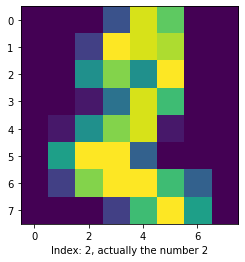

In [213]:
%matplotlib inline
from matplotlib import pyplot as plt 
# We show one of the digits.
d_index = 2
plt.imshow(training_digits[d_index].reshape(8,8))
plt.xlabel(f"Index: {d_index}, actually the number {training_labels[d_index]}")
# Note: digits.images[i] is the same as digits.data[i], but in 8x8 format (no need to reshape).
# We would however like to stress that the 64 pixel images we'll be working with are stored in vector format.

In [214]:
#training_labels
training_digits[np.where(training_labels == 9)]


array([[ 0.,  0., 11., ...,  3.,  0.,  0.],
       [ 0.,  0.,  6., ..., 13., 11.,  1.],
       [ 0.,  0.,  9., ..., 12., 11.,  0.],
       ...,
       [ 0.,  0.,  2., ..., 16.,  6.,  0.],
       [ 0.,  0.,  1., ...,  7.,  0.,  0.],
       [ 0.,  0.,  6., ..., 12.,  0.,  0.]])

In [215]:
digits.data.shape

(1797, 64)

## Tasks

a) Get all rows with label 4. Store that in the matrix $A_4$. Similarly for $A_9$. This should be two single lines of code!

In [216]:
a4 = training_digits[np.where(training_labels == 4)]    # Replace with your code.
a9 = training_digits[np.where(training_labels == 9)] 
a4.shape
# Replace with your code.

(57, 64)

b) Compute the thin SVD $A_4 = U_4\Sigma_4 V^T_4$ and similarly for $A_9$. Thin here means that you do not necessarily get the full-rank square $U,V^T$ matrices.

In [217]:
u4,sigma4,vt4=np.linalg.svd(a4, full_matrices=False)

In [218]:
u9,sigma9,vt9=np.linalg.svd(a9, full_matrices=False)

**Note** Our data is stored by row (one row per digit). What we use the different matrices in the decomposition for is thus slightly different than if it was stored by column. Instead of picking the best $k$ columns of $U$ we pick the best $k$ rows of $V^T$.

c) Let $sample4$ be the first row of $A_4$ and $sample9$ be the first row of $A_9$.

In [219]:
sample4=a4[0,:]
sample9=a9[0,:]

In [220]:
sample4

array([ 0.,  0.,  0.,  1., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  8.,
        0.,  0.,  0.,  0.,  0.,  1., 13.,  6.,  2.,  2.,  0.,  0.,  0.,
        7., 15.,  0.,  9.,  8.,  0.,  0.,  5., 16., 10.,  0., 16.,  6.,
        0.,  0.,  4., 15., 16., 13., 16.,  1.,  0.,  0.,  0.,  0.,  3.,
       15., 10.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.])

In [221]:
sample9

array([ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16., 16.,
       13.,  0.,  0.,  0.,  3., 16., 12., 10., 14.,  0.,  0.,  0.,  1.,
       16.,  1., 12., 15.,  0.,  0.,  0.,  0., 13., 16.,  9., 15.,  2.,
        0.,  0.,  0.,  0.,  3.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0.,
        9., 15.,  4.,  0.,  0.,  0.,  9., 12., 13.,  3.,  0.,  0.])

d) Let $R$ be the first 3 rows of $V^T$. Compute the orthogonal projection of $sample4$ onto the row space of $R_4$, and onto the row space of $R_9$

In [222]:
r4 = vt4[0:3,:]  
r9 = vt9[0:3,:]  

coeffs_in_r4 = r4 @ sample4.transpose()  
coeffs_in_r9 = r9 @ sample9.transpose() 

sample4_in_r4 = coeffs_in_r4 @ r4   # Linear combination of rows in R4
sample4_in_r9 = coeffs_in_r9 @ r9   

[Mathematical aside: where did the $\Sigma$ go? This is a very important matrix, and strongly affects both interpretations and (in general) row- and column spaces. *Assuming* that the rank is $\geq 3$ the row spaces should be the same whether or not we scale the basis vectors by some $\sigma_i$ (since $\sigma_i > 0$ for all $i=1,2,\ldots, r$). That is enough for our application, though the interpretations of the vectors might be different. The rank assumption is rather important, and we will make rather casually based on knowledge about the data set. Later, we'll include a check for this in our code.]

e) Which of the projections is closest to sample4 (in the sense that the difference (sample4_in_z**?**t - sample4) as the smallest 2-norm?

In [223]:
print(np.linalg.norm(sample4_in_r4 - sample4))
print(np.linalg.norm(sample4_in_r9 - sample9))


19.75899698363075
29.93786823269645


f) Create a function `split_data(data, data_labels, labels)` which takes a matrix of data (such as `training_data`), the labels of all rows (such as `training_labels`) and a vector of the labels (here the numbers 0,...,9) and returns a dictionary mapping a label to the matrix of all corresponding data. 

Here the dictionary would for instance have the key 2, and the corresponding value be the matrix of all the images in `data` classified as the number 2.

In [224]:
a=np.array([1,2,3,4,5,6,7,8,9])
def split_data(data,data_labels,labels):
    label_data=[np.where(data_labels==label) for label in labels]
    val_data = [data[i] for i in label_data]
    dict_d=dict(zip(labels,val_data))
    return dict_d
        
labelled_data =split_data(training_digits,training_labels,a)
labelled_data

{1: array([[ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  1.,  0.],
        [ 0.,  0.,  0., ..., 15.,  4.,  0.],
        ...,
        [ 0.,  0., 10., ..., 16., 16., 11.],
        [ 0.,  0.,  3., ..., 16., 15., 11.],
        [ 0.,  0.,  5., ..., 16., 11.,  2.]]),
 2: array([[ 0.,  0.,  0., ..., 16.,  9.,  0.],
        [ 0.,  0.,  5., ..., 13., 12.,  4.],
        [ 0.,  0.,  8., ..., 12., 13.,  1.],
        ...,
        [ 0.,  0.,  3., ..., 12., 14.,  7.],
        [ 0.,  0.,  7., ..., 12., 12., 11.],
        [ 0.,  0.,  9., ..., 16., 16.,  3.]]),
 3: array([[ 0.,  0.,  7., ...,  9.,  0.,  0.],
        [ 0.,  2.,  9., ..., 11.,  0.,  0.],
        [ 0.,  1.,  8., ...,  2.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ..., 16., 11.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        [ 0.,  0.,  1., ..., 16., 16.,  8.]]),
 4: array([[0., 0., 0., ..., 4., 0., 0.],
        [0., 0., 0., ..., 4., 0., 0.],
        [0., 0., 0., ..., 8., 0., 0.],
        ...,
   

f) Create a function `subspaces(labelled_data, k = 3)` that takes a dictionary such as above, and returns a dictionary mapping every occurring label $d$ to the respective $Z_d$ matrix with at most $k$ rows. Here the $Z_d$ matrices is defined as above, the best norm-2-approximation. If a particular matrix has a rank $r < k$, we should only keep $r$ rows (say, if there were many more *different* digit 9-rows in the training set, than digit 1:s)!

In [225]:

def subspaces(labelled_data,k=3):
    vt=u = list(range(len(labelled_data)))
    new_dic = dict(labelled_data)
    j=0
    for i in labelled_data.values():
        u[j],sigma4,vt[j] = np.linalg.svd(i, full_matrices=False)
        if(np.linalg.matrix_rank(vt[j])>=k):
            vt[j] = vt[j][0:k]
        else:
            vt[j] = vt[j]
        new_dic[j] = vt[j]
        j+=1
    return new_dic
spaces = subspaces(dict_label_value,k=8)
spaces   

{0: array([[-2.22044605e-16, -1.11022302e-16, -6.22677983e-02,
         -2.21559903e-01, -1.85755698e-01, -4.65294746e-02,
         -7.19433898e-04,  0.00000000e+00,  0.00000000e+00,
         -1.60651048e-02, -2.16411071e-01, -2.37672403e-01,
         -2.21536861e-01, -1.79709853e-01, -1.83977537e-02,
          0.00000000e+00,  0.00000000e+00, -7.07286375e-02,
         -2.54589437e-01, -8.91593640e-02, -5.90627625e-02,
         -2.16965843e-01, -5.69881345e-02,  0.00000000e+00,
          0.00000000e+00, -9.37520410e-02, -2.30953456e-01,
         -2.86090093e-02, -5.65268834e-03, -1.75885867e-01,
         -1.01780725e-01,  0.00000000e+00,  0.00000000e+00,
         -9.65548729e-02, -2.06667165e-01, -1.69539405e-02,
          0.00000000e+00, -1.64728706e-01, -1.15771415e-01,
          0.00000000e+00,  0.00000000e+00, -5.32815091e-02,
         -2.34992285e-01, -4.22723136e-02, -1.81644481e-02,
         -1.96313998e-01, -1.02663267e-01,  0.00000000e+00,
          0.00000000e+00, -1.13684202

g) Create a function `classification(spaces, x)` that takes a dictionary such as produced by `subspaces` above and a single vector and produces the label of the subspace with the smallest norm-2-distance. In the task above, this would have meant that classifying $sample4$ would have produced the label 4 rather than 9, since $sample4$ was closer to the subspace $Z_4$ than the subspace $Z_9$.

In [226]:
def classification(spaces,x):
    distance = [np.linalg.norm((((i@x.T)@i)-x)) for i in spaces.values()]
    label_data = np.where(distance == min(distance) )
    return label_data[0][0]
label = classification(spaces,sample4)
label

4

h) Now pick the first 600 rows as training and the remaining (about 1100) as validation sets. What percentage does the classifier get right? What happens if you pick $k = 5, 10, 100, 1000$? Try it out. (The sharp-eyed student will notice that not all of these choices make sense from a mathematical perspective.)

In [227]:
nrow=len(digits.data)
training_digits = digits.data[0:600, :] 
training_labels = digits.target[0:600]

validation_digits = digits.data[601:nrow, :] 
validation_labels = digits.target[601:nrow]

a = np.arange(0,10,1)
splitData = split_data(training_digits,training_labels,a)

for k in [5,10,100,1000]:
    sub = subspaces(splitData,k)
    label_data = [classification(sub,i) for i in validation_digits]
    label_data = np.array(label_data)
    accuracy = sum(validation_labels == label_data)/len(label_data)*100
    print(accuracy)

92.80936454849498
95.90301003344482
62.04013377926422
62.04013377926422


# 7. Encapsulating the classifier

Above we have a set of functions floating around in a global namespace. If we change some data and rerun some cells, we might get unexpected results. We instead want to encapsulate this in a single class.

a) Create a class `NaiveProjection`. It should have the following properties:
* An instance is created with `NaiveProjection(training_data, training_labels, all_labels, k)` where $k$ is optional (and defaults to 3). 

For instance, we should be able to run ```dig_class = NaiveProjection(training_data = digits.data[0:600,:], training_labels = digits.target[0:600], all_labels = digits.target_names)```.
* The class should have a method called `classification` which takes vector and returns the classification of that vector as defined above (minimum 2-norm distance to the subspace).
* The class should have a method called `hitrate` which takes a matrix of row vectors, a vector of correct labels and returns the rate of successfully classified 
* All data about subspaces and labels should be stored within the instance. We may not use any data stored outside (though it is of course OK to call outside functions). We should be able to create two (or more) independent classifiers

```
dig15 = NaiveProjection(digits.data[0:600, :], digits.target[0:600], k = 15)
dig1 = NaiveProjection(digits.data[0:600, :], digits.target[0:600], k = 1)
```
which should be entirely independent.

In [228]:
class NaiveProjection:
    def __init__(self,training_data, training_labels, all_labels, k = 3):
        self.training_data = training_data
        self.training_label = training_labels
        self.all_labels = all_labels
        self.k = k
        
    def classification(self,x):
        
        label_data=[np.where(self.training_label==label) for label in self.all_labels]
        val_data = [self.training_data[i] for i in label_data]
        dict_d=dict(zip(self.all_labels,val_data))
        
        vt=u = list(range(len(dict_d)))
        spaces = dict(dict_d)
        j=0
        
        for i in dict_d.values():
            u[j],sigma,vt[j] = np.linalg.svd(i, full_matrices=False)
            if(np.linalg.matrix_rank(vt[j])>=self.k):
                vt[j] = vt[j][0:self.k]
            else:
                vt[j] = vt[j]
            spaces[j] = vt[j]
            j+=1
        
        distance = [np.linalg.norm((((i@x.T)@i)-x)) for i in spaces.values()]
        label = np.where(distance == min(distance))
        return label[0][0]
        
    def hitrate(self,row_vector,correct_label):
        label = [self.classification(i) for i in row_vector]
        label = np.array(label)
        accuracy = sum(correct_label == label)/len(correct_label)
        return accuracy*100

In [229]:
# You can test here
dig1 = NaiveProjection(digits.data[0:600, :], digits.target[0:600], digits.target_names, k = 1)
dig15 = NaiveProjection(digits.data[0:600, :], digits.target[0:600], digits.target_names, k = 15)

print(f"Hit rate for k = 1: {dig1.hitrate(digits.data[600:], digits.target[600:])}")
print(f"Hit rate for k = 15: {dig15.hitrate(digits.data[600:], digits.target[600:])}")

Hit rate for k = 1: 84.7953216374269
Hit rate for k = 15: 96.74185463659147


There are several noteworthy issues here.
* We have taken a few mathematical shortcuts.
* There is no error handling. 
* We have not discussed overlapping subspaces, sampling strategies or the like.
* It might make a lot more sense to classify a matrix of vectors, rather than a single vector (to utilise the speed of computations). 

Most of this is left to an actual statistics course. The interested reader is referred to for instance Strang - Linear algebra and learning from data, or Golub & van Loan - Matrix computations.

b) Experiment with different values of $k$ and training data/validation data sets. Plot the results using the library ```matplotlib```.

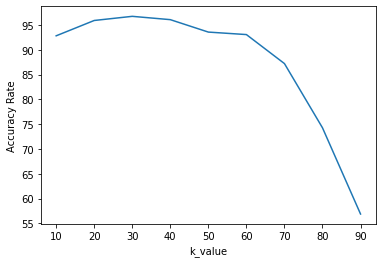

In [230]:
import matplotlib.pyplot as plt
k_values= [i for i in range(1,10)]
accuracy=list()
for k in k_values:
    model=NaiveProjection(digits.data[0:600,:], digits.target[0:600], digits.target_names, k=k*5)
    accuracy.append(model.hitrate(digits.data[600:],digits.target[600:]))
p_range= [ i*10 for i in range (1,10)]
plt.plot(p_range, accuracy)
plt.xlabel(f"k_value")
plt.ylabel(f"Accuracy Rate")
plt.show()

## Acknowledgments

This lab in 732A74 is by Anders Märak Leffler (2019), with a major revision in 2020. The introductory text is by Johan Falkenjack (2018).

Licensed under [CC-BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/).